# Nervous system widespread analysis of glycine receptor subunit expression in Zeisel et al. (2018) dataset

The following analysis was performed for our article; , where we wanted to investigate the expression of Glra3 in distinct areas of the central nervous system as well as bodily organs in both female and male mice to investigate if there are any expressional differences between the sexes. Using qPCR, we found that () 

For the following analysis, we wanted to validate the expressional findings from the qPCR with analysis of pre-existing single-cell mRNA sequencing data. Here, we are invesigating the Glra3 expression in the different areas of the nervous system, including the peripheral nervous system, spinal cord and brain. The analysis was conducted on the Zeisel et al (2018) dataset [1]. The dataset 'l5_all.loom' was aquired from (http://mousebrain.org/) and contains expressional data from 27,998 genes in 160,796 cells. The dataset was analysed using SCANPY [2].

The major findings of this sequencing analysis is that Glra3 is lowly expressed in a number of different areas brain areas and spinal cord- both excitatory and inhibitory neurons, as well as in hindbrain and enteric neurons. Expression was however not found in peripheral neurons nor the cerebellum. 



References;


[1] Zeisel, A., Hochgerner, H., Lönnerberg, P. et al. (2018). Molecular Architecture of the Mouse Nervous System. Cell, doi: 10.1016/j.cell.2018.06.021

[2] Wolf, F.A.,Angerer, P., Theis, F.J. 2018. SCANPY: large-scale single-cell gene expression data analysis. 

In [1]:
# import necessary modules 
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import loompy

# make the text in figures editable in Illustrator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The following functions were used for analysis of the Zeisel et al dataset

In [2]:
"""function for calculating the percentage of cells expressing gene of interest"""
def percentage_exp(adata, genes):
    per_list = []
    for gene in genes:
        percentage = len(adata[adata[:, gene].X > 0.1])/len(adata.X) # calculate the percentage of cells expressing gene(s) of interest
        per_list.append((gene, percentage*100)) # add the name of gene and the percentage to list
    return sorted(per_list, key=lambda tup: tup[1], reverse = True) #rank the level of prevalence in list

"""function for calculating the number of cells expressing gene of interest"""
def number_exp(adata, genes):
    num_list = []
    for gene in genes:
        percentage = len(adata[adata[:, gene].X > 0.1])/len(adata.X)# calculate the percentage of cells expressing gene(s) of interest
        num_list.append((gene, percentage*len(adata.X))) # add the name of gene and the number of cells expressing gene of intererest
    return sorted(num_list, key=lambda tup: tup[1], reverse = True) #rank the level of prevalence in list
                                                           
    

"""function for calculating the number of cells belonging to specific categorical observation"""
def calc_celltype_observation(adata, observation):
    pd_adata = pd.DataFrame(index = adata.obs_names, columns = adata.var_names, data = adata.X) #convert AnnData object to a dataframe. 
    # does not work to make calculations directly onthe AnnData object
    pd_adata['obs_name'] = adata.obs[observation] #create new column in dataframe depending on the target observation in the AnnData object
    pd_celltype = pd.DataFrame(pd_adata.loc[pd_adata.index, 'obs_name']) # extract the index and the target observation
    pd_celltype = pd.DataFrame(pd_adata.groupby('obs_name').size(), columns = ['number_cells']) #calculate the number of cells belonging to each 
    return(pd_celltype)  

In [3]:
# read the Zeisel et al dataset
adata = sc.read_loom('l5_all.loom', sparse = False)
adata

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 160796 × 27998
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cl

In [4]:
# isolate all true neurons in the dataset
adata = adata[adata.obs['Class'] == 'Neurons']
adata

View of AnnData object with n_obs × n_vars = 74539 × 27998
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascula

In [5]:
calc_celltype_observation(adata, 'TaxonomyRank1')

,number_cells
obs_name,
Neurons,74539


In [6]:
calc_celltype_observation(adata, 'TaxonomyRank2')

,number_cells
obs_name,
CNS neurons,70968
PNS neurons,3571


In [7]:
calc_celltype_observation(adata, 'TaxonomyRank3')

,number_cells
obs_name,
Cerebellum neurons,5292
"Cholinergic, monoaminergic and peptidergic neurons",3977
Di- and mesencephalon neurons,10481
Enteric neurons,1105
Hindbrain neurons,1144
Immature neural,5466
Peripheral sensory neurons,1580
Spinal cord neurons,1922
Sympathetic neurons,886


In [8]:
calc_celltype_observation(adata, 'TaxonomyRank4')

,number_cells
obs_name,
Cerebellum neurons,5292
Cholinergic and monoaminergic neurons,1071
Dentate gyrus granule neurons,4368
Di- and mesencephalon excitatory neurons,6455
Di- and mesencephalon inhibitory neurons,4026
Enteric neurons,1105
Glutamatergic neuroblasts,644
Hindbrain neurons,1144
Non-glutamatergic neuroblasts,4822


In [9]:
calc_celltype_observation(adata, 'Description')

,number_cells
obs_name,
Adrenergic cell groups of the medulla,40
Afferent nuclei of cranial nerves III-V,52
Afferent nuclei of cranial nerves VI-XII,72
"Axo-axonic, cortex/hippocampus",675
"Basket and bistratified cells, cortex/hippocampus",547
...,...
"R-LM border Cck interneurons, cortex/hippocampus",1241
"Serotonergic neurons, hindbrain",437
"Sleep-active, long-range projection interneurons, cortex/hippocampus",385


In [10]:
calc_celltype_observation(adata, 'Region')

,number_cells
obs_name,
Amygdala,958
Cerebellum,5249
Cortex,15216
Dentate gyrus,6194
Dorsal root ganglion,1580
Enteric nervous system,1105
Hippocampus,3214
"Hippocampus,Cortex",7542
Hypothalamus,2033


In [5]:
# filter out cells expressing less than 200 different genes and genes found in less than 3 cells
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata

# make variables and observations unique
adata.var_names_make_unique()
adata.obs_names_make_unique()
adata

Trying to set attribute `.obs` of view, copying.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are n

AnnData object with n_obs × n_vars = 74529 × 21194
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cla

In [10]:
# no ERCC genes identified, do not use to calulate metrics
print([name for name in adata.var_names if name.startswith('ERCC')])
print([name for name in adata.var_names if name.startswith('ercc')])

[]
[]


In [6]:
# add the total counts per cell as observation
adata.obs['n_counts'] = np.sum(adata.X, axis=1)

# annotate the group of mitochondrial genes as 'mt'
adata.var['mt'] = adata.var_names.str.startswith('mt-')  
# calulate the general metrics and metrics based on mitochondrial genes
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

# make variables and observations unique
adata.var_names_make_unique()
adata.obs_names_make_unique()
adata

AnnData object with n_obs × n_vars = 74529 × 21194
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cla

... storing 'Age' as categorical
... storing 'AnalysisPool' as categorical
... storing 'AnalysisProject' as categorical
... storing 'Bucket' as categorical
... storing 'CellConc' as categorical
... storing 'Cell_Conc' as categorical
... storing 'ChipID' as categorical
... storing 'Class' as categorical
... storing 'ClusterName' as categorical
... storing 'Comment' as categorical
... storing 'Comments' as categorical
... storing 'DateCaptured' as categorical
... storing 'Date_Captured' as categorical
... storing 'Description' as categorical
... storing 'Developmental_compartment' as categorical
... storing 'DonorID' as categorical
... storing 'Estimated Number of Cells' as categorical
... storing 'Flowcell' as categorical
... storing 'Fraction Reads in Cells' as categorical
... storing 'Label' as categorical
... storing 'Location_based_on' as categorical
... storing 'Mean Reads per Cell' as categorical
... storing 'Median Genes per Cell' as categorical
... storing 'Median UMI Counts per

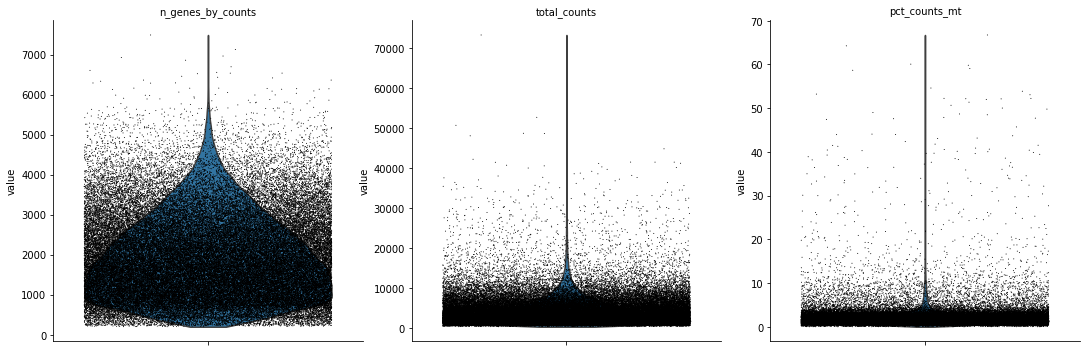

AnnData object with n_obs × n_vars = 74529 × 21194
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cla

In [13]:
#plot some general information and the mitochondrial data
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

# make variables and observations unique
adata.var_names_make_unique()
adata.obs_names_make_unique()
adata

In [14]:
# make variables and observations unique
adata.var_names_make_unique()
adata.obs_names_make_unique()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log1p_total_counts', ylabel='Density'>

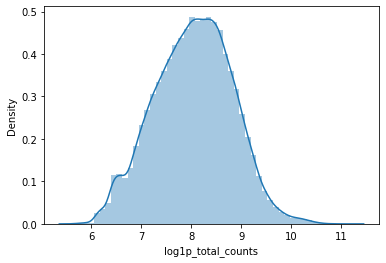

In [15]:
# plot the distribution of logaritmized total counts. Want to include cells with higher counts
# to avoid smaller cells such as glial cells
sns.distplot(adata.obs['log1p_total_counts'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


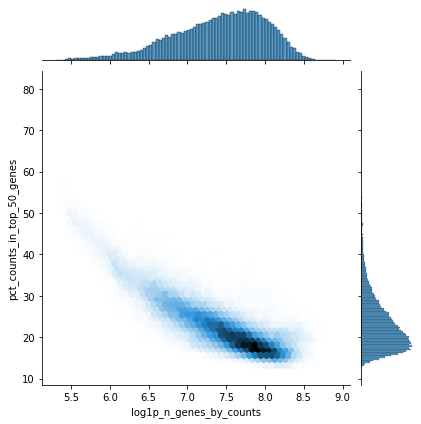

In [16]:
# plot the logaritmized number of genes by counts and the percentage of counts that express the top 50 most expressed genes
sns.jointplot('log1p_n_genes_by_counts', 'pct_counts_in_top_50_genes', data=adata.obs, kind="hex")

In [7]:
# do the actual filtering to exclude cells 
adata = adata[adata.obs.pct_counts_mt < 20, :] # include cells with low mithochondrial expression
adata = adata[adata.obs.log1p_total_counts > 6.5, :]
adata = adata[adata.obs.pct_counts_in_top_50_genes < 50, :] # filter cells with distributed gene counts
adata = adata[adata.obs.log1p_n_genes_by_counts > 6.0, :] # filter cells with broad gene capture

In [8]:
# normalize the number of reads per cell to the median number of reads
sc.pp.normalize_per_cell(adata, counts_per_cell_after= adata.obs['n_counts'].median())

Trying to set attribute `.obs` of view, copying.


In [9]:
# logaritmize data
sc.pp.log1p(adata)

adata

AnnData object with n_obs × n_vars = 72020 × 21194
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cla

In [37]:
calc_celltype_observation(adata, 'Region')

,number_cells
obs_name,
Amygdala,956
Cerebellum,3240
Cortex,15205
Dentate gyrus,6177
Dorsal root ganglion,1580
Enteric nervous system,943
Hippocampus,3210
"Hippocampus,Cortex",7507
Hypothalamus,1981


## Analysis of Glra3 expression in all neurons based on nervous system area

From violin plot, can see that Glra3 is expressed lowly, but widespreadly expressed in the nervous system

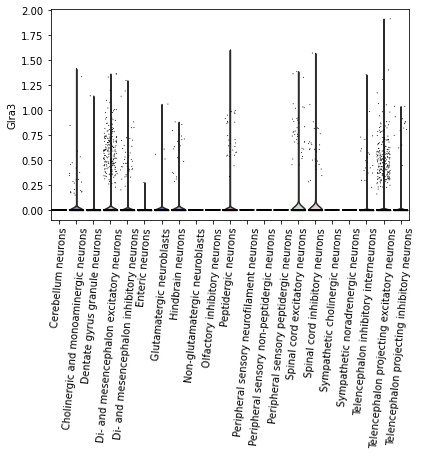

In [20]:
sc.pl.violin(adata, 'Glra3', use_raw = False, stripplot= True, jitter = 0.4, groupby = 'TaxonomyRank4', 
             rotation =85, save= 'violin_glra3_expression.pdf')

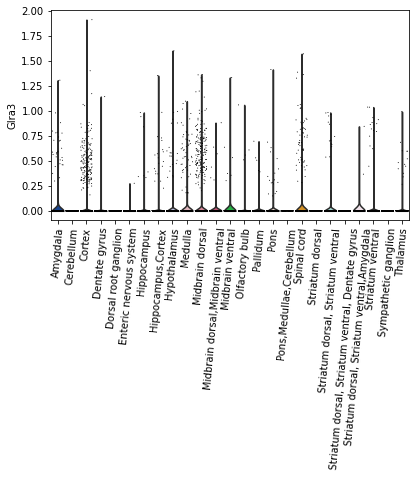

In [21]:
sc.pl.violin(adata, 'Glra3', use_raw = False, stripplot= True, jitter = 0.4, groupby = 'Region', 
             rotation =85, save= 'violin_glra3_expression_region.pdf')

Here, the expression of Glra3, as well as Slc17a6 (Vglut2, excitatory marker) and Slc32a1 (Viaat, inhibitory marker) was investigated in all neurons of the respective nervous system areas using a dotplot. Even more here, we can see that Glra3 is lowly expressed in a small portion of the respective Glra3 expressing area

... storing 'glra1_cell' as categorical
... storing 'glra2_cell' as categorical
... storing 'glra4_cell' as categorical
... storing 'glrb_cell' as categorical


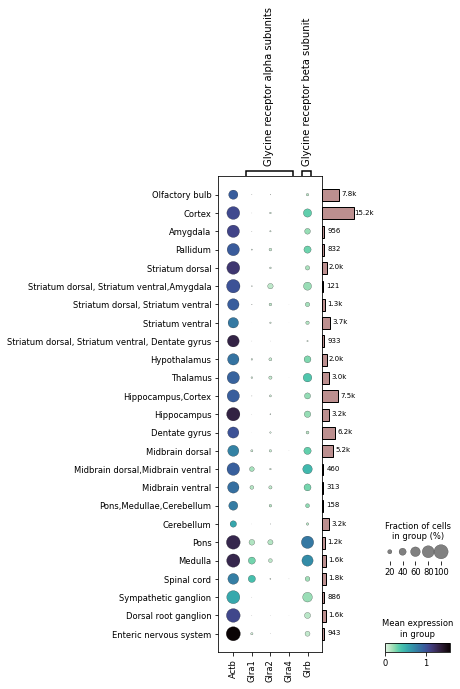

In [15]:
marker_genes = ['Actb', 'Glra1', 'Glra2', 'Glra4', 'Glrb']
labels = ['Glycine receptor alpha subunits', 'Glycine receptor beta subunit']
label_pos = [(1,3), (4,4)]
order_cat = ['Olfactory bulb', 
             'Cortex', 'Amygdala', 
             'Pallidum', 'Striatum dorsal', 
             'Striatum dorsal, Striatum ventral,Amygdala', 
             'Striatum dorsal, Striatum ventral', 'Striatum ventral', 'Striatum dorsal, Striatum ventral, Dentate gyrus',           
             'Hypothalamus', 'Thalamus', 'Hippocampus,Cortex', 'Hippocampus', 
             'Dentate gyrus', 'Midbrain dorsal', 'Midbrain dorsal,Midbrain ventral', 
             'Midbrain ventral',  'Pons,Medullae,Cerebellum', 'Cerebellum', 'Pons',
             'Medulla', 'Spinal cord', 'Sympathetic ganglion', 'Dorsal root ganglion',
             'Enteric nervous system']   

sc.pl.DotPlot(adata, marker_genes, var_group_labels =labels, var_group_positions= label_pos, 
                          use_raw = False, groupby = 'Region', categories_order= order_cat, cmap ='mako_r').add_totals(color = 'rosybrown').savefig('glrs_expression.pdf')

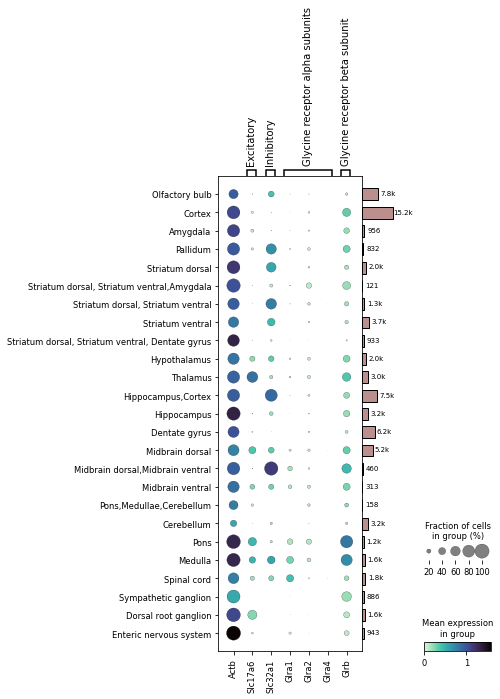

In [16]:
marker_genes = ['Actb', 'Slc17a6', 'Slc32a1','Glra1', 'Glra2', 'Glra4', 'Glrb']
labels = ['Excitatory', 'Inhibitory','Glycine receptor alpha subunits', 'Glycine receptor beta subunit']
label_pos = [(1,1), (2,2), (3,5), (6,6)]
order_cat = order_cat = ['Olfactory bulb', 
             'Cortex', 'Amygdala', 
             'Pallidum', 'Striatum dorsal', 
             'Striatum dorsal, Striatum ventral,Amygdala', 
             'Striatum dorsal, Striatum ventral', 'Striatum ventral', 'Striatum dorsal, Striatum ventral, Dentate gyrus',           
             'Hypothalamus', 'Thalamus', 'Hippocampus,Cortex', 'Hippocampus', 
             'Dentate gyrus', 'Midbrain dorsal', 'Midbrain dorsal,Midbrain ventral', 
             'Midbrain ventral',  'Pons,Medullae,Cerebellum', 'Cerebellum', 'Pons',
             'Medulla', 'Spinal cord', 'Sympathetic ganglion', 'Dorsal root ganglion',
             'Enteric nervous system']   

sc.pl.DotPlot(adata, marker_genes, var_group_labels =labels, var_group_positions= label_pos, 
                          use_raw = False, groupby = 'Region', categories_order= order_cat, cmap ='mako_r').add_totals(color = 'rosybrown').savefig('glrs_expression_inh_exc.pdf')

To further investigate the Glra3 expressing neurons, the expression of Glra3 is plotted as a scatter plot in order to set a expression level threshold (where cells are considered to express Glra3). Based on this plot, the threshold is set to 0.1 (log1p value)

The prevalence of expression of targeted Glr genes is investigated in all neurons in the dataset

Calculate the percentage of cells in each nervous system area that expressed Glra3

In [14]:
adata.obs['glra1_cell'] = (adata[:, 'Glra1'].X > 0.1).astype(str)
adata.obs['glra2_cell'] = (adata[:, 'Glra2'].X > 0.1).astype(str)
adata.obs['glra4_cell'] = (adata[:, 'Glra4'].X > 0.1).astype(str)
adata.obs['glrb_cell'] = (adata[:, 'Glrb'].X > 0.1).astype(str)


# isolate the glycine receptor subunit expressing cells
adata_a1 = adata[adata.obs['glra1_cell'] == 'True']
adata_a2 = adata[adata.obs['glra2_cell'] == 'True']
adata_a4 = adata[adata.obs['glra4_cell'] == 'True']
adata_b = adata[adata.obs['glrb_cell'] == 'True']

In [17]:
df_a1 = calc_celltype_observation(adata_a1, 'Region')
df_all = calc_celltype_observation(adata, 'Region')

# print the percentage of neurons from each cluster expressing Glra1
print(df_a1.div(df_all)*100)

                                                  number_cells
obs_name                                                      
Amygdala                                              0.523013
Cerebellum                                            0.123457
Cortex                                                0.203880
Dentate gyrus                                         0.048567
Dorsal root ganglion                                  0.316456
Enteric nervous system                                8.801697
Hippocampus                                           0.186916
Hippocampus,Cortex                                    0.652724
Hypothalamus                                          5.451792
Medulla                                              39.591315
Midbrain dorsal                                       8.435819
Midbrain dorsal,Midbrain ventral                     23.260870
Midbrain ventral                                     17.571885
Olfactory bulb                                        0

In [23]:
calc_celltype_observation(adata_a1, 'Region')

,number_cells
obs_name,
Amygdala,5
Cerebellum,4
Cortex,31
Dentate gyrus,3
Dorsal root ganglion,5
Enteric nervous system,83
Hippocampus,6
"Hippocampus,Cortex",49
Hypothalamus,108


In [22]:
df_a2 = calc_celltype_observation(adata_a2, 'Region')

# print the percentage of neurons from each cluster expressing Glra1
print(df_a2.div(df_all)*100)

                                                  number_cells
obs_name                                                      
Amygdala                                              4.393305
Cerebellum                                            0.895062
Cortex                                                5.827031
Dentate gyrus                                         4.970050
Dorsal root ganglion                                  0.189873
Enteric nervous system                                0.318134
Hippocampus                                           2.803738
Hippocampus,Cortex                                    7.752764
Hypothalamus                                         12.771328
Medulla                                              17.688378
Midbrain dorsal                                       9.646426
Midbrain dorsal,Midbrain ventral                      5.434783
Midbrain ventral                                     14.057508
Olfactory bulb                                        1

In [24]:
calc_celltype_observation(adata_a2, 'Region')

,number_cells
obs_name,
Amygdala,42
Cerebellum,29
Cortex,886
Dentate gyrus,307
Dorsal root ganglion,3
Enteric nervous system,3
Hippocampus,90
"Hippocampus,Cortex",582
Hypothalamus,253


In [21]:
df_a4 = calc_celltype_observation(adata_a4, 'Region')

# print the percentage of neurons from each cluster expressing Glra1
print(df_a4.div(df_all)*100)

                                                  number_cells
obs_name                                                      
Amygdala                                                   NaN
Cerebellum                                                 NaN
Cortex                                                0.006577
Dentate gyrus                                              NaN
Dorsal root ganglion                                  0.063291
Enteric nervous system                                     NaN
Hippocampus                                                NaN
Hippocampus,Cortex                                         NaN
Hypothalamus                                               NaN
Medulla                                                    NaN
Midbrain dorsal                                       0.115296
Midbrain dorsal,Midbrain ventral                           NaN
Midbrain ventral                                           NaN
Olfactory bulb                                         

In [25]:
calc_celltype_observation(adata_a4, 'Region')

,number_cells
obs_name,
Cortex,1
Dorsal root ganglion,1
Midbrain dorsal,6
Spinal cord,4
"Striatum dorsal, Striatum ventral",1
Striatum ventral,1
Thalamus,1


In [20]:
df_b = calc_celltype_observation(adata_b, 'Region')

# print the percentage of neurons from each cluster expressing Glra1
print(df_b.div(df_all)*100)

                                                  number_cells
obs_name                                                      
Amygdala                                             30.125523
Cerebellum                                            9.444444
Cortex                                               48.451167
Dentate gyrus                                        12.465598
Dorsal root ganglion                                 31.708861
Enteric nervous system                               24.390244
Hippocampus                                          35.140187
Hippocampus,Cortex                                   32.369788
Hypothalamus                                         38.313983
Medulla                                              73.116220
Midbrain dorsal                                      41.102998
Midbrain dorsal,Midbrain ventral                     58.695652
Midbrain ventral                                     39.297125
Olfactory bulb                                        9

In [26]:
calc_celltype_observation(adata_b, 'Region')

,number_cells
obs_name,
Amygdala,288
Cerebellum,306
Cortex,7367
Dentate gyrus,770
Dorsal root ganglion,501
Enteric nervous system,230
Hippocampus,1128
"Hippocampus,Cortex",2430
Hypothalamus,759
